In [154]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numba import jit
import cv2
from IPython.display import clear_output
from sklearn.preprocessing import LabelEncoder
from IPython.core import display as ICD
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import math
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

plt.style.use("seaborn")

import warnings
warnings.filterwarnings("ignore")

In [150]:
import sys, os
script_dir = sys.path[0]
print(script_dir)

C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project


In [170]:
#Constant zone
IMG_PATH_TRAIN = os.path.join(script_dir+r'\train')
IMG_PATH_TEST = os.path.join(script_dir+r'\test1')
IMG_PATH_TRAIN_MOD = os.path.join(script_dir+r'\train_modified')
IMG_PATH_TEST_MOD = os.path.join(script_dir+r'\test_modified')
print("Train path:",IMG_PATH_TRAIN+"\n")
print("Test path:",IMG_PATH_TEST+"\n")
print("Modified train path:",IMG_PATH_TRAIN_MOD+"\n")
print("Modified test path:",IMG_PATH_TEST_MOD)

MODIFIED_WIDTH = 50
MODIFIED_HEIGHT = 50

COLOR = 'white'
#FONT = 'Adobe'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['figure.facecolor'] = 'black'

plt.rc('axes', titlesize=25) #fontsize of the title
plt.rc('axes', labelsize=19) #fontsize of the x and y labels
plt.rc('xtick', labelsize=19) #fontsize of the x tick labels
plt.rc('ytick', labelsize=19) #fontsize of the y tick labels
#plt.rcParams['font.family'] = FONT

Train path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\train

Test path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\test1

Modified train path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\train_modified

Modified test path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\test_modified


In [4]:
#Function zone

def modify_img(image, new_width, new_height): #Modifies an image according to chosen parameters
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    modified_img = cv2.resize(gray_img, (new_width, new_height))
    return modified_img

def read_img(picture_path, filename): #Reads file from path
    return cv2.imread(picture_path+"/"+filename, -1)

def write_img(destination_path, filename, image): #Writes new file to given path
    cv2.imwrite(destination_path+"/"+filename, image)
     
def modify_train(): #Modifies the train data and writes it to the appropriate directory
    count = 0
    for f in os.listdir(IMG_PATH_TRAIN):
        img = read_img(picture_path = IMG_PATH_TRAIN, filename = f)
        mod_img = modify_img(img, new_width = MODIFIED_WIDTH, new_height = MODIFIED_HEIGHT)
        write_img(destination_path = IMG_PATH_TRAIN_MOD, filename = f, image = mod_img)
        msg = "Modified {0}% of training data".format(int(count/250))
        print(msg)
        clear_output(wait=True)
        count += 1

    print("Train data modification complete")
    
def modify_test(): #Modifies the test data and writes it to the appropriate directory
    count = 0
    for f in os.listdir(IMG_PATH_TEST):
        img = read_img(picture_path = IMG_PATH_TEST, filename = f)
        mod_img = modify_img(img, new_width = MODIFIED_WIDTH, new_height = MODIFIED_HEIGHT)
        write_img(destination_path = IMG_PATH_TEST_MOD, filename = f, image = mod_img)
        msg = "Modified {0}% of testing data".format(int(count/250))
        print(msg)
        clear_output(wait=True)
        count += 1

    print("Test data modification complete")
      
@jit(nogil = True)
def images_to_df_train(): #Returns dataframe of the train files
    train_array = np.ndarray(shape = (0,MODIFIED_WIDTH,MODIFIED_HEIGHT), dtype= 'uint8')
    label_names = []
    count = 0
    for f in os.listdir(IMG_PATH_TRAIN_MOD):
        img = read_img(picture_path = IMG_PATH_TRAIN_MOD, filename = f)
        train_array = np.insert(train_array, count , img.reshape((1,MODIFIED_WIDTH,MODIFIED_HEIGHT)), axis = 0)
        label_names.append(f.split('.')[0])
        msg = "Loaded {0} images. {1}%".format(count, count/250)
        print(msg)

        clear_output(wait=True)
        count += 1
    print("Data loading complete")
    
    train_df = pd.DataFrame(data = train_array.reshape(25000, MODIFIED_WIDTH*MODIFIED_HEIGHT))
    label_df = pd.DataFrame(data = label_names, columns = ['label'])
    label_df.insert(loc=0, column='Label', value=LabelEncoder().fit_transform(label_df['label']))
    label_df = label_df.drop(columns = ['label'])
    train_final = pd.concat([train_df, label_df], axis = 1)
    print("Train dataframe loading complete")
    return train_final

@jit(nogil = True)
def images_to_df_test(): #Returns dataframe of the test files
    test_array = np.ndarray(shape = (0,MODIFIED_WIDTH,MODIFIED_HEIGHT), dtype= 'uint8')
    count = 0
    for f in os.listdir(IMG_PATH_TEST_MOD):
        img = read_img(picture_path = IMG_PATH_TEST_MOD, filename = f)
        test_array = np.insert(test_array, count , img.reshape((1,MODIFIED_WIDTH,MODIFIED_HEIGHT)), axis = 0)
        msg = "Loaded {0} images. {1}%".format(count, count/125)
        print(msg)

        clear_output(wait=True)
        count += 1
    print("Data loading complete")
    test_df = pd.DataFrame(data = test_array.reshape(12500, MODIFIED_WIDTH*MODIFIED_HEIGHT))
    print("Test dataframe loading complete")
    return test_df

In [14]:
%%time
modify_train()

Train data modification complete
Wall time: 2min 26s


In [16]:
%%time
train_df = images_to_df_train()

Data loading complete
Train dataframe loading complete
Wall time: 4min 12s


In [18]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,Label
0,174,180,182,193,196,204,203,208,211,216,...,12,12,8,6,5,2,3,2,2,0
1,43,59,38,41,44,37,37,39,40,45,...,66,84,54,42,50,57,61,61,30,0
2,45,47,50,59,55,51,53,46,42,45,...,73,73,78,120,154,160,143,163,165,0
3,220,225,234,236,226,225,233,229,226,225,...,246,245,236,227,215,205,211,220,212,0
4,113,122,93,132,199,154,205,231,152,252,...,102,99,95,99,87,83,105,91,91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,140,144,147,148,149,151,153,153,155,158,...,162,165,162,164,164,167,167,168,169,1
24996,87,93,77,76,65,84,83,69,118,113,...,58,57,81,93,94,90,80,103,67,1
24997,50,52,53,45,50,48,53,33,97,66,...,215,77,151,111,155,83,182,80,178,1
24998,254,237,200,123,108,89,76,88,94,86,...,106,88,103,90,95,98,103,102,110,1


In [20]:
print("Null count in the train dataframe:",train_df.isnull().sum().sum())
print("Dataframe shape:",train_df.shape)

Null count in the train dataframe: 0
Dataframe shape: (25000, 2501)


## Models without unsupervised preprocessing

### Dummy model

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1:]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify = y)
print("Train shape:",X_train.shape)
print("Test shape:",y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print("Test class counts:",dict(zip(unique, counts)))

Train shape: (22500, 2500)
Test shape: (2500, 1)
Test class counts: {0: 1250, 1: 1250}


In [24]:
from sklearn.dummy import DummyClassifier
dum = DummyClassifier(strategy="uniform")
dum.fit(X_train, y_train)
print("Dummy model train score:",dum.score(X_train, y_train))
print("Dummy model test score:",dum.score(X_test, y_test))

Dummy model train score: 0.5
Dummy model test score: 0.5028


## Apply PCA on the data

In [44]:
PCA_data = train_df.iloc[:,:-1]

In [45]:
from sklearn.decomposition import PCA

In [85]:
%%time
pca_model = PCA(n_components=0.95,whiten=True, random_state = 42)
pca_model.fit(PCA_data)

Wall time: 14.4 s


PCA(n_components=0.95, random_state=42, whiten=True)

Text(0, 0.5, 'Explained variance')

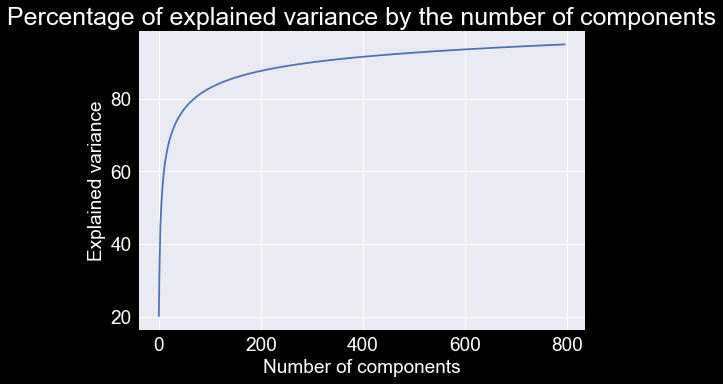

In [86]:
plt.grid(True)
plt.plot(np.cumsum(pca_model.explained_variance_ratio_ * 100))
plt.title("Percentage of explained variance by the number of components")
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [87]:
pca_new_reduced = pca_model.transform(PCA_data)
print("Fit complete with n_components = {0}".format(pca_model.n_components_))
pca_recovered = pca_model.inverse_transform(pca_new_reduced)

Fit complete with n_components = 796


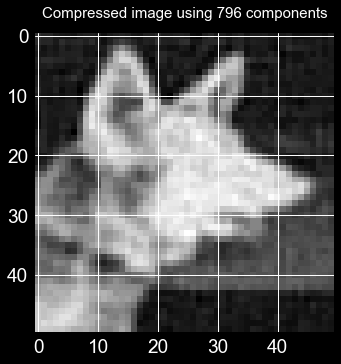

In [88]:
image_pca = pca_recovered[24999,:].reshape([MODIFIED_WIDTH,MODIFIED_HEIGHT])
plt.imshow(image_pca, cmap='gray_r')
plt.title('Compressed image using {0} components'.format(pca_model.n_components_), fontsize=15, pad=15)

In [89]:
print("New dataframe shape:",pca_new_reduced.shape)
print("New recovered dataframe shape:",pca_recovered.shape)

New dataframe shape: (25000, 796)
New recovered dataframe shape: (25000, 2500)


In [97]:
pca_data = pd.DataFrame(pca_new_reduced)
pca_data = pd.DataFrame(StandardScaler().fit_transform(pca_data))
pca_data = pd.concat([pca_data, y], axis = 1)
X_new = pca_data.iloc[:,:-1]
y_new = pca_data.iloc[:,-1:]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.10, random_state=42, stratify = y)
print("Train shape:",X_train_new.shape)
print("Test shape:",X_test_new.shape)
unique, counts = np.unique(y_test_new, return_counts=True)
print("Test class counts:",dict(zip(unique, counts)))

Train shape: (22500, 796)
Test shape: (2500, 796)
Test class counts: {0: 1250, 1: 1250}


## Applying models on data after PCA dimensionality reduction

### Logistic regression

In [98]:
%%time
logistic_model = LogisticRegression(solver = 'lbfgs', 
                                    n_jobs = os.cpu_count() - 1,  
                                    class_weight = 'balanced', 
                                    multi_class = 'ovr',  
                                    random_state=42)
logistic_model.fit(X_train_new, y_train_new.values.ravel())

Wall time: 3.46 s


LogisticRegression(class_weight='balanced', multi_class='ovr', n_jobs=11,
                   random_state=42)

In [171]:
print("Classes known to the model:",logistic_model.classes_)
scores = cross_validate(logistic_model, X_train_new, y_train_new.values.ravel(), cv = 3, return_train_score = True)
print("Logistic regression baseline train score:",logistic_model.score(X_train_new, y_train_new))
print("Logistic regression cross-validation train score:",scores['train_score'].mean())
print("Logistic regression baseline test score:",logistic_model.score(X_test_new, y_test_new))
print("Logistic regression cross-validation test score:",scores['test_score'].mean())

Classes known to the model: [0 1]
Logistic regression baseline train score: 0.6027555555555556
Logistic regression cross-validation train score: 0.6146222222222223
Logistic regression baseline test score: 0.5428
Logistic regression cross-validation test score: 0.5402666666666667


### Naive bayes 

In [139]:
%%time
naive_bayes_model = GaussianNB(var_smoothing = math.pow(10,-3)).fit(X_train_new, y_train_new.values.ravel())

Wall time: 258 ms


In [172]:
print("Class count:",naive_bayes_model.class_count_)
print("Classes known to the model:",naive_bayes_model.classes_)
scores = cross_validate(forest, X_train_new, y_train_new.values.ravel(), cv = 3, return_train_score = True)
print("Naive bayes baseline train score:",naive_bayes_model.score(X_train_new, y_train_new))
print("Naive bayes cross-validation train score:",scores['train_score'].mean())
print("Naive bayes baseline test score:",naive_bayes_model.score(X_test_new, y_test_new))
print("Naive bayes cross-validation test score:",scores['test_score'].mean())

Class count: [11250. 11250.]
Classes known to the model: [0 1]
Naive bayes baseline train score: 0.5788444444444445
Naive bayes cross-validation train score: 0.6230222222222223
Naive bayes baseline test score: 0.556
Naive bayes cross-validation test score: 0.5916888888888888


### SGD classifier

In [208]:
%%time
SGD_model = SGDClassifier(alpha = 1.5,loss = 'modified_huber',class_weight = 'balanced', random_state=42).fit(X_train_new, y_train_new.values.ravel())

Wall time: 504 ms


In [209]:
scores = cross_validate(SGD_model, X_train_new, y_train_new.values.ravel(), cv = 3, return_train_score = True)
print("SGD baseline train score:",SGD_model.score(X_train_new, y_train_new))
print("SGD cross-validation train score:",scores['train_score'].mean())
print("SGD baseline test score:",SGD_model.score(X_test_new, y_test_new))
print("SGD cross-validation test score:",scores['test_score'].mean())

SGD baseline train score: 0.6035111111111111
SGD cross-validation train score: 0.6145555555555555
SGD baseline test score: 0.5436
SGD cross-validation test score: 0.5423111111111112


### Random forest

In [159]:
%%time
forest = RandomForestClassifier(criterion = 'gini',n_estimators=300, random_state=42, n_jobs = os.cpu_count() - 1,max_depth=1)
forest.fit(X_train_new, y_train_new.values.ravel())

Wall time: 1.97 s


RandomForestClassifier(max_depth=1, n_estimators=300, n_jobs=11,
                       random_state=42)

In [160]:
scores = cross_validate(forest, X_train_new, y_train_new.values.ravel(), cv = 3, return_train_score = True)
print("Random forest baseline train score:",forest.score(X_train_new, y_train_new))
print("Random forest cross-validation train score:",scores['train_score'].mean())
print("Random forest baseline test score:",forest.score(X_test_new, y_test_new))
print("Random forest cross-validation test score:",scores['test_score'].mean())

Random forest baseline train score: 0.6225777777777778
Random forest cross-validation train score: 0.6230222222222223
Random forest baseline test score: 0.5852
Random forest cross-validation test score: 0.5916888888888888


### Gradient boosting

In [123]:
%%time
Gradient_classifier = GradientBoostingClassifier(n_iter_no_change=None, max_features = None,random_state = 42, warm_start = True, tol = 1)
Gradient_classifier.fit(X_train_new, y_train_new.values.ravel())

Wall time: 1min 50s


GradientBoostingClassifier(n_iter_no_change=20, random_state=42, tol=1,
                           warm_start=True)

In [124]:
print("Number of clases known to model:",Gradient_classifier.classes_)
print("Gradient classifier baseline training score:",Gradient_classifier.score(X_train_new, y_train_new))
print("Gradient classifier baseline test score:",Gradient_classifier.score(X_test_new, y_test_new))

Number of clases known to model: [0 1]
Gradient classifier baseline training score: 0.6393333333333333
Gradient classifier baseline test score: 0.6136


### XGBoost

In [239]:
from xgboost import XGBClassifier
from sklearn import metrics

In [326]:
%%time
XGC_model=XGBClassifier(max_depth=2, 
                        learning_rate=0.1, 
                        n_estimators=100, 
                        objective='binary:logistic', 
                        booster='gbtree', 
                        colsample_bytree = 0.9).fit(X_train_new, y_train_new)

Wall time: 16 s


In [327]:
prediction_train=XGC_model.predict(X_train_new)
prediction_test=XGC_model.predict(X_test_new)

In [328]:
print("Train scores")
print(metrics.classification_report(y_train_new, prediction_train))
print(metrics.confusion_matrix(y_train_new, prediction_train))
print("Test scores")
print(metrics.classification_report(y_test_new, prediction_test))
print(metrics.confusion_matrix(y_test_new, prediction_test))

Train scores
              precision    recall  f1-score   support

           0       0.68      0.63      0.65     11250
           1       0.65      0.70      0.68     11250

    accuracy                           0.66     22500
   macro avg       0.67      0.66      0.66     22500
weighted avg       0.67      0.66      0.66     22500

[[7062 4188]
 [3352 7898]]
Test scores
              precision    recall  f1-score   support

           0       0.62      0.56      0.59      1250
           1       0.60      0.66      0.63      1250

    accuracy                           0.61      2500
   macro avg       0.61      0.61      0.61      2500
weighted avg       0.61      0.61      0.61      2500

[[702 548]
 [431 819]]


## Grid-search on models

In [72]:
from sklearn.model_selection import GridSearchCV

'\nWe will use gridsearch on the new PCA data since the training of the models is much faster on the data with less dimensions\n'

In [167]:
def plot_grid_results(model_checked, grid_model): #Plots grid-search score results from best to worst
    grid_data = pd.DataFrame(grid_model.cv_results_)
    params = []
    for param in grid_model.best_params_:
        params.append("param_"+param)
    params.append('mean_test_score')
    
    grid_frame_mod = grid_data.loc[:,params]
    grid_frame_mod = grid_frame_mod.fillna(value = "None") ##Replace None with 'None' strings for plotability.
    grp = grid_frame_mod.groupby(by = params[:-1]).agg(lambda x: x).mean_test_score.nlargest(n = grid_data.shape[0])
    min_value = grid_data['mean_test_score'].min()
    max_value = grid_data['mean_test_score'].max()
    
    
    ICD.display(grid_data)#Display the results data-frame
    plt.figure(facecolor='black') 
    grp.plot(kind = "bar", figsize = (24, 8), color = "Blue")
    ax = plt.axes()
    ax.set_facecolor("black")
    plt.ylabel("Score")
    plt.title("Gridsearch results sorted from highest to lowest({0})".format(model_checked))
    ax.set_ylim([(min_value - 0.001) ,max_value])
    plt.show()
    msg = "Best {0} model: {1} with an accuracy of {2}".format(model_checked, grid_model.best_params_, grid_model.best_score_)
    print(msg)

### Logistic-regression

In [181]:
LOG = LogisticRegression(class_weight = 'balanced', multi_class = 'ovr', random_state=42, n_jobs = os.cpu_count() - 1)
parameters = {"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
LOG_grid = GridSearchCV(LOG, parameters, cv = 3 ,verbose = 1, return_train_score = True).fit(X_train_new, y_train_new.values.ravel())

Fitting 3 folds for each of 5 candidates, totalling 15 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,6.933292,0.911573,0.017335,0.000235,newton-cg,{'solver': 'newton-cg'},0.534533,0.540133,0.546133,0.540267,0.004737,1,0.6166,0.615800,0.611467,0.614622,0.002255
1,2.327827,0.052470,0.017336,0.001178,lbfgs,{'solver': 'lbfgs'},0.534533,0.540133,0.546133,0.540267,0.004737,1,0.6166,0.615800,0.611467,0.614622,0.002255
2,0.742963,0.024309,0.018004,0.001472,liblinear,{'solver': 'liblinear'},0.534533,0.540133,0.546133,0.540267,0.004737,1,0.6166,0.615800,0.611467,0.614622,0.002255
3,3.497354,0.071568,0.017503,0.001081,sag,{'solver': 'sag'},0.534533,0.540133,0.546133,0.540267,0.004737,1,0.6166,0.615867,0.611400,0.614622,0.002298
4,2.877831,0.280730,0.019169,0.001701,saga,{'solver': 'saga'},0.534533,0.540133,0.546133,0.540267,0.004737,1,0.6166,0.615800,0.611467,0.614622,0.002255


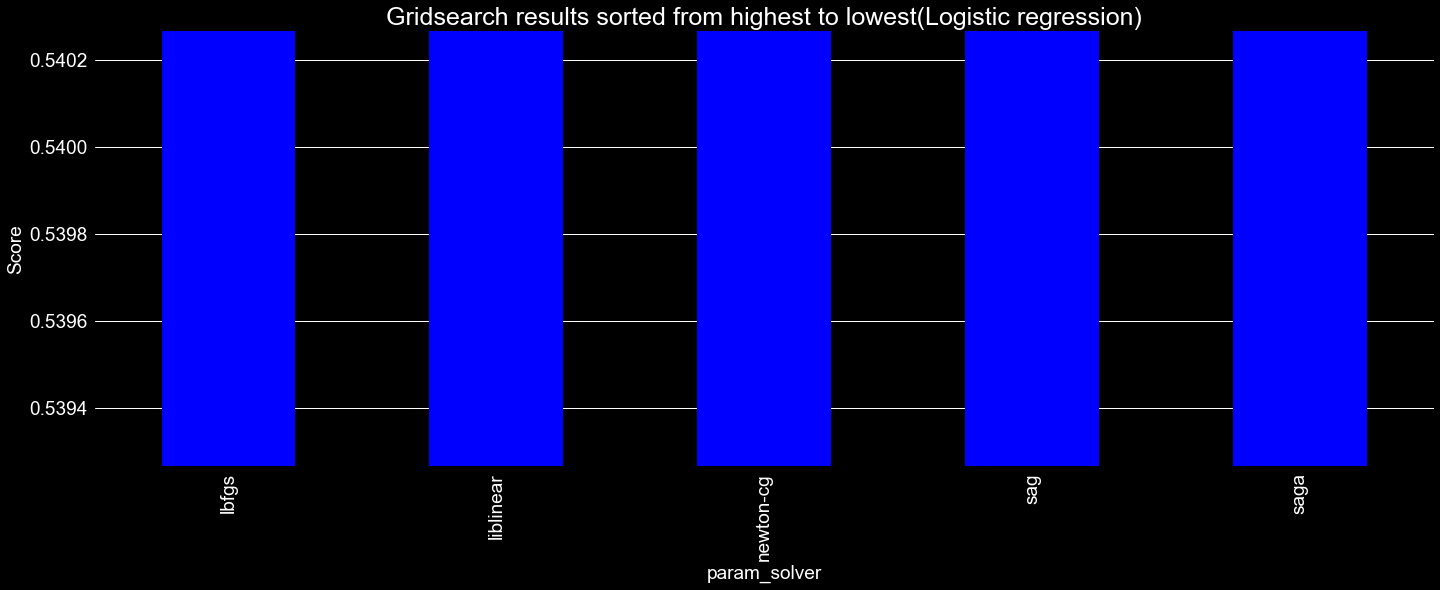

Best Logistic regression model: {'solver': 'newton-cg'} with an accuracy of 0.5402666666666667


In [182]:
plot_grid_results("Logistic regression", LOG_grid)

### Naive bayes

In [176]:
BAYES = GaussianNB()
parameters = {"var_smoothing": [math.pow(10,-9),math.pow(10,-5),math.pow(10,-3),math.pow(10,-1)]}
BAYES_grid = GridSearchCV(BAYES, parameters, cv = 3 ,verbose = 1, return_train_score = True).fit(X_train_new, y_train_new.values.ravel())

Fitting 3 folds for each of 4 candidates, totalling 12 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.201369,0.004498,0.087849,0.000623,1e-09,{'var_smoothing': 1e-09},0.583067,0.575733,0.572267,0.577022,0.004502,2,0.578400,0.578667,0.583200,0.580089,0.002203
1,0.203202,0.005950,0.088683,0.000236,1e-05,{'var_smoothing': 1e-05},0.583067,0.575733,0.572267,0.577022,0.004502,2,0.578467,0.578667,0.583200,0.580111,0.002186
2,0.198368,0.001546,0.089016,0.000816,0.001,{'var_smoothing': 0.001},0.583600,0.576133,0.572267,0.577333,0.004704,1,0.578133,0.578467,0.583467,0.580022,0.002439
3,0.201869,0.003473,0.088183,0.000850,0.1,{'var_smoothing': 0.1},0.578800,0.567200,0.564533,0.570178,0.006193,4,0.569533,0.572600,0.576267,0.572800,0.002753


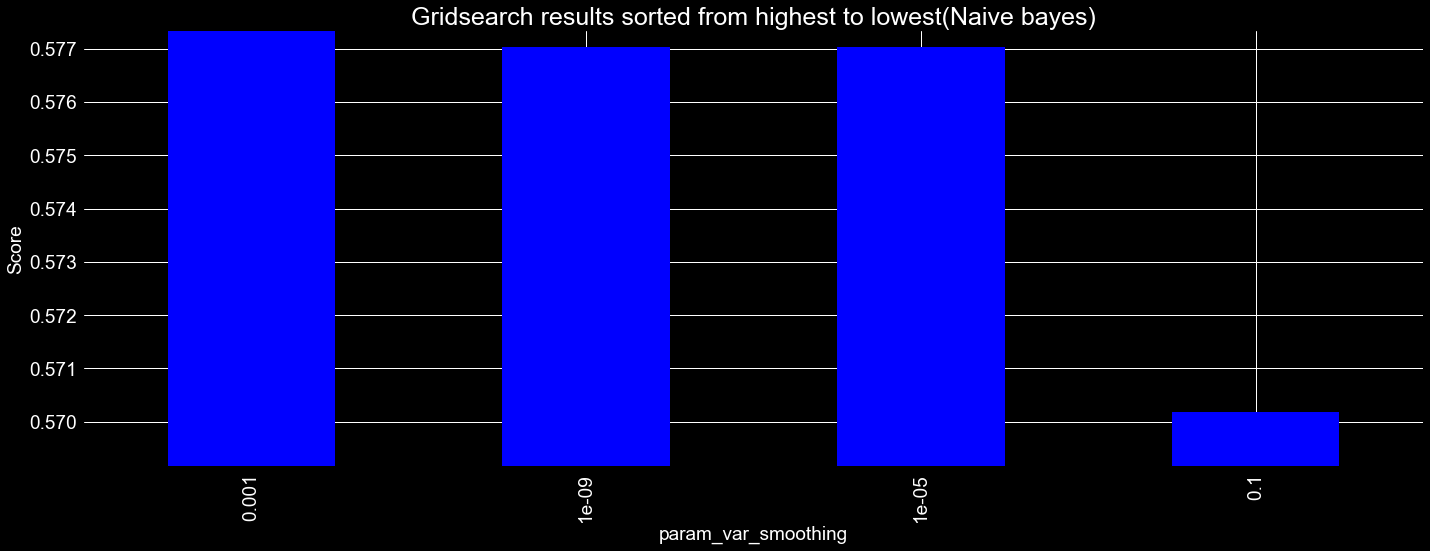

Best Naive bayes model: {'var_smoothing': 0.001} with an accuracy of 0.5773333333333334


In [177]:
plot_grid_results("Naive bayes", BAYES_grid)

###  SGD classifier

In [206]:
SGD = SGDClassifier(class_weight = 'balanced', random_state=42)
parameters = {'alpha' : np.arange(0.5,2,0.5),'loss' : ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber']}
SGD_grid = GridSearchCV(SGD, parameters, cv = 3 ,verbose = 1, return_train_score = True).fit(X_train_new, y_train_new.values.ravel())

Fitting 3 folds for each of 24 candidates, totalling 72 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_loss,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.432743,0.016129,0.015836,2.355728e-04,0.5,hinge,"{'alpha': 0.5, 'loss': 'hinge'}",0.535333,0.532000,0.540533,0.535956,0.003511,6,0.619933,0.590200,0.607533,0.605889,0.012194
1,0.332225,0.008665,0.015670,2.357416e-04,0.5,log_loss,"{'alpha': 0.5, 'loss': 'log_loss'}",0.536400,0.539867,0.544667,0.540311,0.003389,4,0.616733,0.610733,0.615133,0.614200,0.002537
2,0.344560,0.017572,0.016503,4.084134e-04,0.5,log,"{'alpha': 0.5, 'loss': 'log'}",0.536400,0.539867,0.544667,0.540311,0.003389,4,0.616733,0.610733,0.615133,0.614200,0.002537
3,0.542762,0.004589,0.016170,2.357976e-04,0.5,modified_huber,"{'alpha': 0.5, 'loss': 'modified_huber'}",0.536533,0.540667,0.548000,0.541733,0.004742,2,0.617533,0.616333,0.611200,0.615022,0.002747
4,18.587418,0.133113,0.016169,2.355728e-04,0.5,squared_hinge,"{'alpha': 0.5, 'loss': 'squared_hinge'}",0.516667,0.517733,0.508533,0.514311,0.004109,9,0.541600,0.535267,0.509533,0.528800,0.013867
5,0.315722,0.008169,0.016336,4.713704e-04,0.5,perceptron,"{'alpha': 0.5, 'loss': 'perceptron'}",0.503600,0.514800,0.516000,0.511467,0.005584,13,0.550133,0.543733,0.547467,0.547111,0.002625
6,24.093881,0.133340,0.016003,7.867412e-07,0.5,squared_error,"{'alpha': 0.5, 'loss': 'squared_error'}",0.500667,0.500133,0.497333,0.499378,0.001462,24,0.500600,0.500667,0.495067,0.498778,0.002624
7,0.251878,0.011580,0.015836,2.358539e-04,0.5,huber,"{'alpha': 0.5, 'loss': 'huber'}",0.534000,0.500000,0.500000,0.511333,0.016028,14,0.607667,0.500000,0.500000,0.535889,0.050755
8,0.373399,0.006460,0.015837,2.355168e-04,1,hinge,"{'alpha': 1.0, 'loss': 'hinge'}",0.531867,0.501733,0.502000,0.511867,0.014143,12,0.592000,0.504267,0.515400,0.537222,0.038999
9,0.336392,0.023387,0.018004,1.633459e-03,1,log_loss,"{'alpha': 1.0, 'loss': 'log_loss'}",0.532933,0.512533,0.507867,0.517778,0.010885,7,0.612400,0.540533,0.534067,0.562333,0.035501


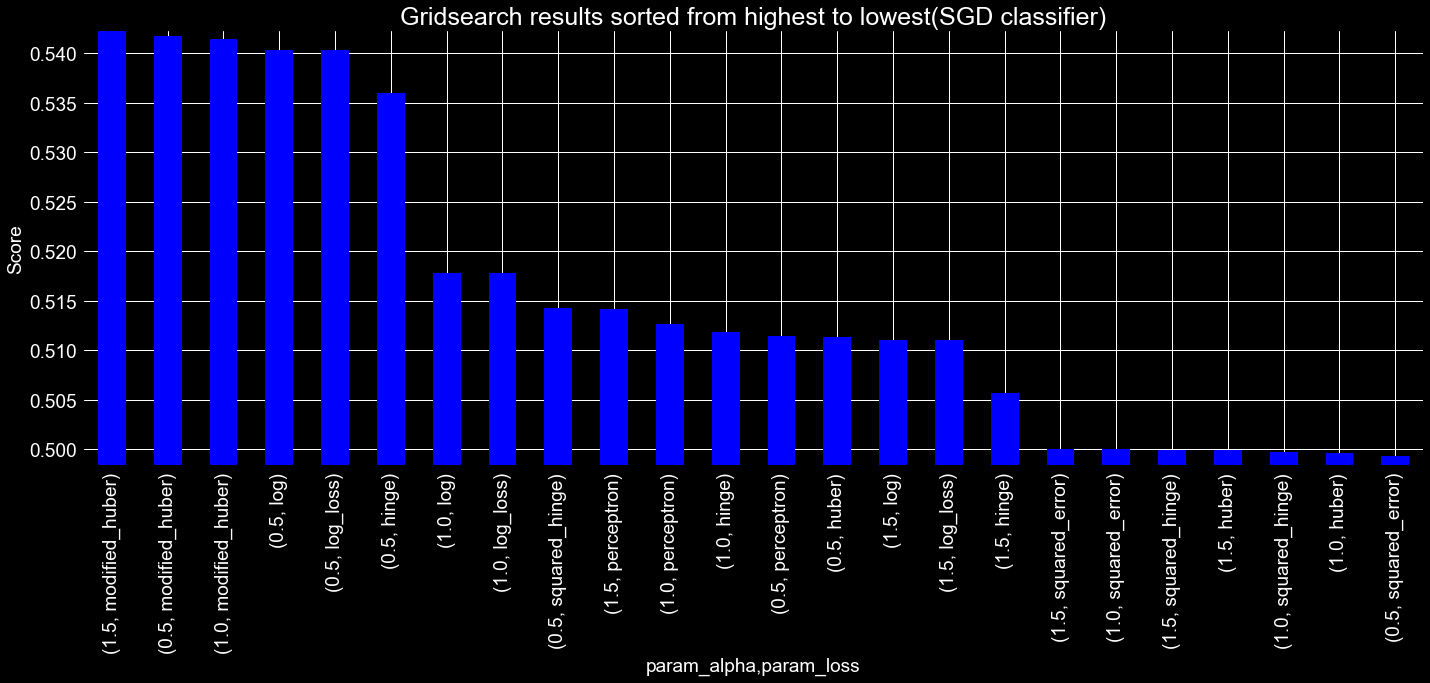

Best SGD classifier model: {'alpha': 1.5, 'loss': 'modified_huber'} with an accuracy of 0.5423111111111112


In [207]:
plot_grid_results("SGD classifier", SGD_grid)

### Random forest

In [179]:
FOREST = RandomForestClassifier(n_estimators = 300,random_state=42, n_jobs = os.cpu_count() - 1)
parameters = {"criterion": ["gini", "entropy"], 'max_depth' : np.arange(1,10)}
FOREST_grid = GridSearchCV(FOREST, parameters, cv = 3 ,verbose = 1, return_train_score = True).fit(X_train_new, y_train_new.values.ravel())

Fitting 3 folds for each of 18 candidates, totalling 54 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.561633,0.037229,0.107019,0.009203,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.595733,0.594000,0.585333,0.591689,0.004549,18,0.621667,0.621533,0.625867,0.623022,0.002012
1,2.605408,0.034689,0.103518,0.003241,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.607467,0.597733,0.588267,0.597822,0.007839,15,0.639000,0.639400,0.641467,0.639956,0.001081
2,3.771456,0.067150,0.107686,0.002719,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.612400,0.601867,0.591467,0.601911,0.008546,13,0.660200,0.655267,0.658600,0.658022,0.002055
3,5.028290,0.082897,0.104352,0.001434,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.616800,0.604667,0.592267,0.604578,0.010016,9,0.682533,0.681200,0.685600,0.683111,0.001842
4,6.039699,0.018815,0.104518,0.001225,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.612000,0.606400,0.596933,0.605111,0.006218,8,0.721400,0.718600,0.720867,0.720289,0.001214
5,7.239452,0.105918,0.111186,0.000235,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.617867,0.606267,0.596133,0.606756,0.008879,6,0.772200,0.768867,0.768733,0.769933,0.001604
6,8.191291,0.045466,0.109019,0.004302,gini,7,"{'criterion': 'gini', 'max_depth': 7}",0.614800,0.607067,0.598533,0.606800,0.006644,5,0.830133,0.828533,0.827733,0.828800,0.000998
7,9.180789,0.088419,0.110353,0.002095,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.622533,0.604667,0.599067,0.608756,0.010007,2,0.871067,0.873667,0.872600,0.872444,0.001067
8,10.255406,0.105296,0.123522,0.014442,gini,9,"{'criterion': 'gini', 'max_depth': 9}",0.617067,0.609600,0.601200,0.609289,0.006481,1,0.899133,0.897733,0.899133,0.898667,0.000660
9,2.479434,0.015724,0.107351,0.002249,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.597467,0.594000,0.586267,0.592578,0.004682,17,0.622267,0.621133,0.626200,0.623200,0.002171


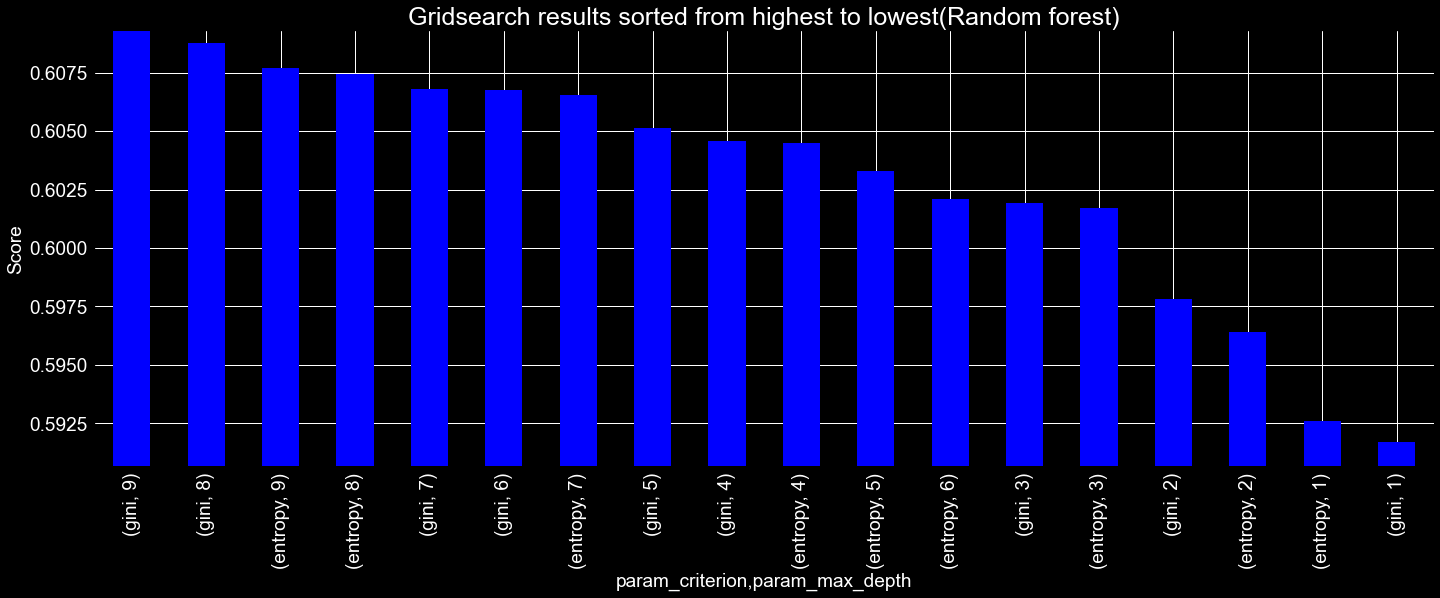

Best Random forest model: {'criterion': 'gini', 'max_depth': 9} with an accuracy of 0.6092888888888889


In [180]:
plot_grid_results("Random forest", FOREST_grid)

### Gradient boosting

In [187]:
# GRADIENT = GradientBoostingClassifier(n_iter_no_change=None, max_features = None,random_state = 42, warm_start = True, tol = 1)
# parameters = {'learning_rate' : np.arange(0.1,1,0.1)}
# GRADIENT_grid = GridSearchCV(GRADIENT, parameters, cv = 3 ,verbose = 3, return_train_score = True).fit(X_train_new, y_train_new.values.ravel())

In [ ]:
# plot_grid_results("Gradient boosting", GRADIENT_grid)

### XGBoost

In [329]:
# XGC
# param_grid = {
#     'n_estimators': [100],
#     'colsample_bytree': [0.7, 0.8],
#     'max_depth': [15,25],
#     'reg_alpha': [1.1, 1.3],
#     'reg_lambda': [1.1, 1.3],
#     'subsample': [0.7, 0.9]
# }
# grid = GridSearchCV(estimator=XGC, param_grid=param_grid, cv=3, verbose = 3)
# XGC_grid = grid.fit(X_train, y_train)
# print("Best Score: {}".format(XGB_grid.best_score_))
# print("Best Parameters:" + XGB_grid.best_params_)

## MiniBatchK-Means with the models in the same pipeline

In [188]:
from sklearn.cluster import MiniBatchKMeans

### Logistic regression

In [237]:
pipeline_log = Pipeline([
 ("minibatchKmeans", MiniBatchKMeans(n_clusters=200,random_state=42, batch_size=3072)),
 ("log_reg", LogisticRegression(solver = 'lbfgs', 
                                    n_jobs = os.cpu_count() - 1,  
                                    class_weight = 'balanced', 
                                    multi_class = 'ovr',  
                                    random_state=42)),
], verbose = True)
pipeline_log.fit(X_train_new, y_train_new.values.ravel())

[Pipeline] ... (step 1 of 2) Processing minibatchKmeans, total=   3.9s
[Pipeline] ........... (step 2 of 2) Processing log_reg, total=   5.3s


Pipeline(steps=[('minibatchKmeans',
                 MiniBatchKMeans(batch_size=3072, n_clusters=200,
                                 random_state=42)),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', multi_class='ovr',
                                    n_jobs=11, random_state=42))],
         verbose=True)

In [238]:
print("Pipeline score(train) when using minibatchKmeans on Logistic regression:",pipeline_log.score(X_train_new, y_train_new))
print("Pipeline score(test) when using minibatchKmeans on Logistic regression:",pipeline_log.score(X_test_new, y_test_new))

Pipeline score(train) when using minibatchKmeans on Logistic regression: 0.5816444444444444
Pipeline score(test) when using minibatchKmeans on Logistic regression: 0.56


### Naive bayes

In [229]:
pipeline_bayes = Pipeline([
 ("minibatchKmeans", MiniBatchKMeans(n_clusters=200,random_state=42, batch_size=3072)),
 ("naive_bayes", GaussianNB(var_smoothing = math.pow(10,-3))),
], verbose = True)
pipeline_bayes.fit(X_train_new, y_train_new.values.ravel())

[Pipeline] ... (step 1 of 2) Processing minibatchKmeans, total=   3.8s
[Pipeline] ....... (step 2 of 2) Processing naive_bayes, total=   0.1s


Pipeline(steps=[('minibatchKmeans',
                 MiniBatchKMeans(batch_size=3072, n_clusters=200,
                                 random_state=42)),
                ('naive_bayes', GaussianNB(var_smoothing=0.001))],
         verbose=True)

In [230]:
print("Pipeline score(train) when using minibatchKmeans on naive bayes:",pipeline_bayes.score(X_train_new, y_train_new))
print("Pipeline score(test) when using minibatchKmeans on naive baeys:",pipeline_bayes.score(X_test_new, y_test_new))

Pipeline score(train) when using minibatchKmeans on naive bayes: 0.5596
Pipeline score(test) when using minibatchKmeans on naive baeys: 0.544


### SGD classifier

In [231]:
pipeline_SGD = Pipeline([
 ("minibatchKmeans", MiniBatchKMeans(n_clusters=200,random_state=42, batch_size=3072)),
 ("SGD_classifier", SGDClassifier(alpha = 1.5,loss = 'modified_huber',class_weight = 'balanced', random_state=42)), 
],verbose = True).fit(X_train_new, y_train_new.values.ravel())

[Pipeline] ... (step 1 of 2) Processing minibatchKmeans, total=   4.1s
[Pipeline] .... (step 2 of 2) Processing SGD_classifier, total=   1.5s


In [232]:
print("Pipeline score(train) when using minibatchKmeans on SGD classifier:",pipeline_SGD.score(X_train_new, y_train_new))
print("Pipeline score(test) when using minibatchKmeans on SGD classifier:",pipeline_SGD.score(X_test_new, y_test_new))

Pipeline score(train) when using minibatchKmeans on SGD classifier: 0.5219555555555555
Pipeline score(test) when using minibatchKmeans on SGD classifier: 0.5128


### Random forest

In [233]:
pipeline_trees = Pipeline([
 ("minibatchKmeans", MiniBatchKMeans(n_clusters=200,random_state=42, batch_size=3072)),
 ("random_forest", RandomForestClassifier(criterion = "gini",n_estimators = 300,random_state=42, n_jobs = os.cpu_count() - 1, max_depth=1)),
], verbose = True)
pipeline_trees.fit(X_train_new, y_train_new.values.ravel())

[Pipeline] ... (step 1 of 2) Processing minibatchKmeans, total=   3.7s
[Pipeline] ..... (step 2 of 2) Processing random_forest, total=   1.2s


Pipeline(steps=[('minibatchKmeans',
                 MiniBatchKMeans(batch_size=3072, n_clusters=200,
                                 random_state=42)),
                ('random_forest',
                 RandomForestClassifier(max_depth=1, n_estimators=300,
                                        n_jobs=11, random_state=42))],
         verbose=True)

In [234]:
print("Pipeline score(train) when using minibatchKmeans on random forest:",pipeline_trees.score(X_train_new, y_train_new))
print("Pipeline score(test) when using minibatchKmeans on random forest:",pipeline_trees.score(X_test_new, y_test_new))

Pipeline score(train) when using minibatchKmeans on random forest: 0.5663555555555555
Pipeline score(test) when using minibatchKmeans on random forest: 0.5608


### Gradient boosting

In [235]:
pipeline_gradient_boost = Pipeline([
 ("minibatchKmeans", MiniBatchKMeans(n_clusters=200,random_state=42, batch_size=3072)),
 ("gradient boosting", GradientBoostingClassifier(max_features = None,random_state = 42, warm_start = True, n_iter_no_change = 20, tol = 1)),
], verbose = True)
pipeline_gradient_boost.fit(X_train_new, y_train_new.values.ravel())

[Pipeline] ... (step 1 of 2) Processing minibatchKmeans, total=   3.8s
[Pipeline] . (step 2 of 2) Processing gradient boosting, total=  25.6s


Pipeline(steps=[('minibatchKmeans',
                 MiniBatchKMeans(batch_size=3072, n_clusters=200,
                                 random_state=42)),
                ('gradient boosting',
                 GradientBoostingClassifier(n_iter_no_change=20,
                                            random_state=42, tol=1,
                                            warm_start=True))],
         verbose=True)

In [236]:
print("Pipeline score(train) when using minibatchKmeans on gradient boosting:",pipeline_gradient_boost.score(X_train_new, y_train_new))
print("Pipeline score(test) when using minibatchKmeans on gradient boosting:",pipeline_gradient_boost.score(X_test_new, y_test_new))

Pipeline score(train) when using minibatchKmeans on gradient boosting: 0.5830222222222222
Pipeline score(test) when using minibatchKmeans on gradient boosting: 0.5604


## Gridsearch for optimal K-clusters

In [214]:
param_grid = {"minibatchKmeans__n_clusters":range(10, 200, 10)}
grid_clf = GridSearchCV(pipeline_log, param_grid, cv=3, verbose=1).fit(X_train_new, y_train_new.values.ravel())

Fitting 3 folds for each of 19 candidates, totalling 57 fits
[Pipeline] ... (step 1 of 2) Processing minibatchKmeans, total=   1.1s
[Pipeline] ........... (step 2 of 2) Processing log_reg, total=   2.2s
[CV 1/3] END ....minibatchKmeans__n_clusters=10;, score=0.570 total time=   3.3s
[Pipeline] ... (step 1 of 2) Processing minibatchKmeans, total=   0.6s
[Pipeline] ........... (step 2 of 2) Processing log_reg, total=   1.0s
[CV 2/3] END ....minibatchKmeans__n_clusters=10;, score=0.558 total time=   1.6s
[Pipeline] ... (step 1 of 2) Processing minibatchKmeans, total=   0.6s
[Pipeline] ........... (step 2 of 2) Processing log_reg, total=   0.9s
[CV 3/3] END ....minibatchKmeans__n_clusters=10;, score=0.555 total time=   1.6s
[Pipeline] ... (step 1 of 2) Processing minibatchKmeans, total=   0.9s
[Pipeline] ........... (step 2 of 2) Processing log_reg, total=   2.9s
[CV 1/3] END ....minibatchKmeans__n_clusters=20;, score=0.569 total time=   3.8s
[Pipeline] ... (step 1 of 2) Processing minibat

In [215]:
pd.DataFrame(grid_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_minibatchKmeans__n_clusters,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.194827,0.782787,0.050509,0.002273,10,{'minibatchKmeans__n_clusters': 10},0.569867,0.558133,0.555467,0.561156,0.006255,8
1,2.588324,0.864165,0.052175,0.001433,20,{'minibatchKmeans__n_clusters': 20},0.569333,0.562267,0.560400,0.564000,0.003847,2
2,2.349607,0.035314,0.059177,0.001248,30,{'minibatchKmeans__n_clusters': 30},0.562933,0.560400,0.553467,0.558933,0.004001,13
3,2.903875,0.219667,0.058676,0.002461,40,{'minibatchKmeans__n_clusters': 40},0.566000,0.562000,0.566667,0.564889,0.002061,1
4,2.461323,0.074251,0.060009,0.002944,50,{'minibatchKmeans__n_clusters': 50},0.569867,0.557867,0.560400,0.562711,0.005164,3
5,2.971319,0.105634,0.065844,0.002655,60,{'minibatchKmeans__n_clusters': 60},0.563333,0.552800,0.560667,0.558933,0.004471,13
6,3.445973,0.179447,0.072513,0.013720,70,{'minibatchKmeans__n_clusters': 70},0.565467,0.558267,0.563067,0.562267,0.002993,4
7,3.660803,0.139661,0.067012,0.004546,80,{'minibatchKmeans__n_clusters': 80},0.560800,0.562800,0.553200,0.558933,0.004135,13
8,4.268018,0.205063,0.068512,0.002450,90,{'minibatchKmeans__n_clusters': 90},0.560533,0.558533,0.552667,0.557244,0.003338,18
9,3.972487,0.348236,0.069012,0.002859,100,{'minibatchKmeans__n_clusters': 100},0.553333,0.559600,0.554533,0.555822,0.002716,19


In [216]:
print("Best pipeline clusters using minibatchKmeans and logistic regression:\n", grid_clf.best_estimator_,"\nwith a score of:",grid_clf.best_score_)

Best pipeline clusters using minibatchKmeans and logistic regression:
 Pipeline(steps=[('minibatchKmeans',
                 MiniBatchKMeans(batch_size=3072, n_clusters=40,
                                 random_state=42)),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', multi_class='ovr',
                                    n_jobs=11, random_state=42))],
         verbose=True) 
with a score of: 0.5648888888888889
